# Step One - Business Problem uderstanding 

**task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Data Understanding & Exploration 

In [5]:
df.describe(include = "object")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [6]:
continues = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
df[continues].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df["Transported"].unique()

array([False,  True])

In [8]:
d_type = dict(df.dtypes)
for name, type in d_type.items():
    if str(type) == 'object':
        print(f"<==============={name}============>")
        print(df[name].value_counts())
        print("\n")

<===============PassengerId============>
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64


<===============HomePlanet============>
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


<===============CryoSleep============>
False    5439
True     3037
Name: CryoSleep, dtype: int64


<===============Cabin============>
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64


<===============Destination============>
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


<===============VIP============>
False    8291
True      199
Name: VIP, dtype: int64


<===============Name============>
Gollux Reedall        2
Elaney Webstephrey    2
Grake Pork

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
df.isnull().sum()/len(df)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

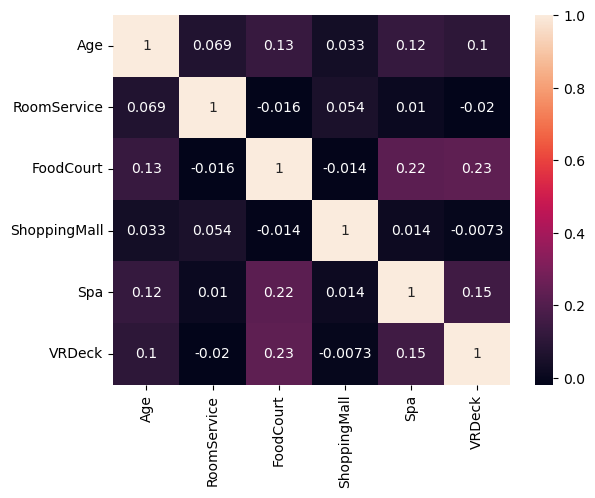

In [12]:
sns.heatmap(df[continues].corr(),annot=True)
plt.show()

In [13]:
df[continues].skew()

Age              0.419097
RoomService      6.333014
FoodCourt        7.102228
ShoppingMall    12.627562
Spa              7.636020
VRDeck           7.819732
dtype: float64

# Data preprocessing
**Data Cleaning**

In [14]:
df=df.drop(["PassengerId","Name"],axis=1)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [15]:
df['Deck'] = df['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')
df['Port'] = df['Cabin'].apply(lambda s:s[-1] if pd.notnull(s) else 'M')
df = df.drop("Cabin",axis=1)

In [16]:
print('Port', df["Port"].mode())
print('Deck', df["Deck"].mode())

Port 0    S
Name: Port, dtype: object
Deck 0    F
Name: Deck, dtype: object


In [17]:
df["Port"].replace({"M":"S"},inplace = True)
df["Deck"].replace({"M":"F"},inplace = True)

In [18]:
con_feat = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
Con_median =df[con_feat].median()
df[con_feat]=df[con_feat].fillna(Con_median)

In [19]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy = 'most_frequent')
impute_var = ["HomePlanet","CryoSleep","Destination","VIP"]
df[impute_var] = mode_imputer.fit_transform(df[impute_var])

In [20]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Port            0
dtype: int64

**Feature Engineering**

In [21]:
dum = pd.get_dummies(df["HomePlanet"],drop_first=True)
dum3 = pd.get_dummies(df["Destination"],drop_first=True)
dum4 = pd.get_dummies(df["Port"],drop_first=True)
dum5 = pd.get_dummies(df["Deck"],drop_first=True)
df["CryoSleep"] = df["CryoSleep"].map({False:0,True:1})
df["VIP"] = df["VIP"].map({False:0,True:1})
df["Transported"] = df["Transported"].map({False:0,True:1})

In [22]:
df = pd.concat([df,dum,dum3,dum4,dum5],axis = 'columns')
df=df.drop(["HomePlanet","Destination","Port","Deck"],axis=1)

In [23]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,...,PSO J318.5-22,TRAPPIST-1e,S,B,C,D,E,F,G,T
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,1,1,0,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0,1,1,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,...,0,1,1,0,0,0,0,1,0,0


In [24]:
#Feature Scaling
Feat_scalaing = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df[Feat_scalaing] = sc.fit_transform(df[Feat_scalaing])

In [25]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,...,PSO J318.5-22,TRAPPIST-1e,S,B,C,D,E,F,G,T
0,0,0.711945,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,1,...,0,1,0,1,0,0,0,0,0,0
1,0,-0.334037,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1,0,...,0,1,1,0,0,0,0,1,0,0
2,0,2.036857,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0,1,...,0,1,1,0,0,0,0,0,0,0
3,0,0.293552,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,0,1,...,0,1,1,0,0,0,0,0,0,0
4,0,-0.891895,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1,0,...,0,1,1,0,0,0,0,1,0,0


In [26]:
#X&Y

X = df.drop("Transported",axis=1)
y= df["Transported"]

In [27]:
X.shape

(8693, 20)

- from lazypredict.Supervised import LazyClassifier
- from sklearn.model_selection import train_test_split
- X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =9)
- clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
- models,predictions = clf.fit(X_train, X_test, y_train, y_test)
- print(models)

In [28]:
#Beofe Ann applying PCA for best feature
from sklearn.decomposition import PCA
pca_model = PCA(n_components = .95)
X_pca = pca_model.fit_transform(X)

In [29]:
pca_model.explained_variance_ratio_

array([0.20188747, 0.14541848, 0.1215957 , 0.11283955, 0.1078165 ,
       0.09525813, 0.04568871, 0.03283473, 0.0306061 , 0.02878688,
       0.02153688, 0.01728342])

# Checking with Train Data by applying the SVM

In [30]:
#Modelling
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
estimater = SVC()

param_grid= {"C":[0.01,0.1,1,10,100], "kernel":['linear','rbf','sigmoid','poly']}
grid = GridSearchCV(estimater,param_grid, cv=5, n_jobs = -1)

grid.fit(X_pca,y)

grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [31]:
#Modelling 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
SVM = SVC(kernel = "rbf", C = 1)
SVM.fit(X_pca,y)

#Prediction
y_pred_SVM = SVM.predict(X_pca)

#Evaluation
print("train accuracy:",accuracy_score(y,y_pred_SVM))
print("cross validation score",cross_val_score(SVM,X_pca,y,cv=5,scoring="accuracy").mean())

train accuracy: 0.8099620384217187
cross validation score 0.7960453708366446


In [32]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


**Applying the same Data Cleaning as Earlier**

In [33]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [34]:
df_test=df_test.drop(["PassengerId","Name"],axis=1)
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [35]:
df_test[con_feat]=df_test[con_feat].fillna(Con_median)
df_test[impute_var] = mode_imputer.transform(df_test[impute_var])

In [36]:
df_test['Deck'] = df_test['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')
df_test['Port'] = df_test['Cabin'].apply(lambda s:s[-1] if pd.notnull(s) else 'M')
df_test = df_test.drop("Cabin",axis=1)
df_test["Port"].replace({"M":"S"},inplace = True)
df_test["Deck"].replace({"M":"F"},inplace = True)

In [37]:
df_test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Port            0
dtype: int64

In [38]:
dum = pd.get_dummies(df_test["HomePlanet"],drop_first=True)
dum3 = pd.get_dummies(df_test["Destination"],drop_first=True)
dum4 = pd.get_dummies(df_test["Port"],drop_first=True)
dum5 = pd.get_dummies(df_test["Deck"],drop_first=True)
df_test["CryoSleep"] = df_test["CryoSleep"].map({False:0,True:1})
df_test["VIP"] = df_test["VIP"].map({False:0,True:1})
df_test = pd.concat([df_test,dum,dum3,dum4,dum5],axis = 'columns')
df_test=df_test.drop(["HomePlanet","Destination","Port","Deck"],axis=1)

In [39]:
df_test[Feat_scalaing] = sc.transform(df_test[Feat_scalaing])

In [40]:
df_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,S,B,C,D,E,F,G,T
0,1,-0.124841,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,0,0,1,1,0,0,0,0,0,1,0
1,0,-0.682698,0,-0.333105,-0.275387,-0.283579,2.237598,-0.263003,0,0,0,1,1,0,0,0,0,1,0,0
2,1,0.154088,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,1,0,0,0,1,0,1,0,0,0,0,0
3,0,0.642213,0,-0.333105,3.887680,-0.283579,-0.109808,0.252842,1,0,0,1,1,0,1,0,0,0,0,0
4,0,-0.612966,0,-0.317964,-0.281027,0.778343,-0.270626,-0.263003,0,0,0,1,1,0,0,0,0,1,0,0


In [41]:
df_test_pca = pca_model.transform(df_test)


In [42]:
#Prediction using SVM
Test_pred_ANN = SVM.predict(df_test_pca)

In [43]:
Result = pd.DataFrame(Test_pred_ANN, columns = ["Transported"])

In [44]:
df_test1 = pd.read_csv("test.csv")

In [45]:
df_test1=df_test1["PassengerId"]
df_test1

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [46]:
Result = pd.concat([df_test1,Result],axis = 'columns')
Result

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,1
4274,9271_01,1
4275,9273_01,1


In [47]:
Result["Transported"] = Result["Transported"].map({0:False,1:True})
Result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [48]:
Result.to_csv('result_latest-6th-Jun_SVM.csv', index=False)